In [4]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json 
import sys
import os 

##Scope: 2.	Es “éxito” el que tu video aparezca más días como trending?


In [34]:
# Read original dataset. Date range varies from Nov 2017 up to June 2018
us_csv = "Resources/large_USvideos.csv"

original_df = pd.read_csv(us_csv)
original_df.head(500)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [51]:
original_df.set_index("video_id")
original_df.loc['1ZAPwfrtAFY']

KeyError: 'the label [1ZAPwfrtAFY] is not in the [index]'

In [6]:
# Rename column name 
df= original_df.rename(columns={"video_id": "id"})

#                                        "trending_date": "Trending Date",
#                                        "title": "Title",
#                                        "channel_title": "Channel",
#                                        "category_id": "Category",
#                                        "publish_time": "Publish Date",
#                                        "tags": "Tags",
#                                        "views": "Views",
#                                        "likes": "Likes",
#                                        "dislikes": "Dislikes",
#                                        "comment_count": "Comments"})

df.columns

Index(['id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## Cleaning Data 

In [7]:
# Convert column Title to propper case  
df["title"] = df.title.str.capitalize()

# Deleting columns with no info 
del df['ratings_disabled']
del df['comments_disabled']
del df['video_error_or_removed']


In [8]:
df.head(100)

,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 weeks with iphone x,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy moore & jeff sessions cold open - snl,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 ice cream gadgets put to the test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The greatest showman | official trailer 2 [hd]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,"For now, at least, we have better things to wo..."


In [9]:
df["id"].count()

40949

In [10]:
# Count how many days each video was trending 
video_by_id = df.set_index("id").groupby(["id"])
video_trending_count = video_by_id.count()["title"]

video_trending_count.sort_values(ascending=False)

id
j4KvrAUjn6c    30
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
8h--kFui1JA    29
MAjY8mCTXWk    29
r-3iathMo7o    29
NBSAQenU2Bk    29
WIV3xNz8NoM    28
6S9c5nnDd_s    28
YI3tsmFsrOg    28
vjSohj-Iclc    28
ulNswX3If6U    28
UfKmSfgFxi8    28
2PH7dK6SLC8    28
mdWcaWBxxcY    28
6SuMbFuKDf8    27
BspHjvU11y4    27
-kTWIm7m4Uw    27
H7gh2fmdjCU    27
um-1fAVU1OQ    27
TjXQzRWmb_I    27
Xpv-sEKl1B4    27
nRc0kmOYgzQ    27
1purAy2MsOc    27
0zZ0Y_UZRBw    27
pFc6I0rgmgY    27
ju_inUnrLc4    26
ooyjaVdt-jA    26
D6Oy4LfoqsU    26
               ..
4qSziR6sD8Q     1
uEhv-4Eb9ms     1
J_fFW78fc7s     1
JBw1nwYJESc     1
ilTHiqAmuX8     1
IJKjMIU55pE     1
thIRJLsnIxY     1
tclPO3kOlfM     1
IJlXXvSFyUU     1
IKuKZIISPE0     1
jQF5Q3773uk     1
IOuFE-6Awos     1
5Smb3tZD1Qc     1
5SkwvwSydmk     1
5RjEaUqucbw     1
IXJhN4cOVM0     1
jGyUVyp9w9g     1
jE2VvGZktJo     1
J-NEOU-Ujeg     1
IbmvDn6I6sI     1
IfYRzxeMdGs     1
j28Gt5_Mlo8     1
5HUCAF6898w     1
5HOijUtExiM     1
IlkBLwl

### 2. Es Exito =  el que tu video aparezca más días como trending?

In [11]:
## Cual es la categoria que tiene mas videos trending 

df_top_freq = df.groupby(['id', 'category_id'])['id'].agg(
    {"video_count": len}).sort_values(
    "video_count", ascending=False).head(100).reset_index()
df_top_freq.head()

C:\Users\BohuCyn\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,id,category_id,video_count
0,j4KvrAUjn6c,24,30
1,MAjY8mCTXWk,10,29
2,r-3iathMo7o,28,29
3,NBSAQenU2Bk,1,29
4,8h--kFui1JA,10,29


In [12]:
# que categoria se repite mas veces? 
category_frecuence = df_top_freq.groupby("category_id").id.nunique()
category_frecuence.sort_values(ascending=False)
category_frecuence_df = pd.DataFrame(category_frecuence) 
category_frecuence_df.sort_values("id",ascending=False)
category_frecuence_df= category_frecuence_df.rename(columns={"id": "category_count"})
category_frecuence_df.sort_values("category_count",ascending=False)

,category_count
category_id,
10,29
24,26
26,9
1,6
22,6
23,6
28,5
20,4
27,3


In [13]:
#pasar categorias a nombres 
filepath = os.path.join("Resources/US_category_id.json")
with open(filepath) as jsonfile:
    categories_data = json.load(jsonfile)
categories_data


{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [14]:
category_frecuence_df["category_name"] = ""
category_frecuence_df.sort_values("category_count",ascending=False)
category_frecuence_df.reset_index()

,category_id,category_count,category_name
0,1,6,
1,10,29,
2,15,2,
3,17,1,
4,19,1,
5,20,4,
6,22,6,
7,23,6,
8,24,26,
9,25,1,


In [15]:
#puedo acer una definicion para que solo tome el numero del id y de el resto 
#!!!!!!!!!!!!!!!!!!!!! algo no esta bien pues la cat 19 es Travel & Events y me esta dando film and animation! 
# la def esta basada en el category_count' en vez del category_id pero cuando lo cambio me da problemas
# quizas es por el index ?  intente reset el index pero tampoco me funciona ??? 

def video_category_name(dF): 
    for index,row in category_frecuence_df.iterrows():
        x = category_frecuence_df.loc[index,'category_count']
        if category_frecuence_df.loc[index,'category_count'] == x: 
            category_frecuence_df.loc[index,"category_name"] = categories_data["items"][x-1]["snippet"]["title"] 
video_category_name(category_frecuence_df)
category_frecuence_df.sort_values("category_count",ascending=False)

,category_count,category_name
category_id,,
10,29,Thriller
24,26,Foreign
26,9,Videoblogging
1,6,Short Movies
22,6,Short Movies
23,6,Short Movies
28,5,Sports
20,4,Pets & Animals
27,3,Music


In [16]:
category_names = category_frecuence_df["category_name"]
category_names.head(50)

category_id
1         Short Movies
10            Thriller
15    Autos & Vehicles
17    Film & Animation
19    Film & Animation
20      Pets & Animals
22        Short Movies
23        Short Movies
24             Foreign
25    Film & Animation
26       Videoblogging
27               Music
28              Sports
43    Film & Animation
Name: category_name, dtype: object

In [17]:
category_frecuence_df.reset_index().head(100)


,category_id,category_count,category_name
0,1,6,Short Movies
1,10,29,Thriller
2,15,2,Autos & Vehicles
3,17,1,Film & Animation
4,19,1,Film & Animation
5,20,4,Pets & Animals
6,22,6,Short Movies
7,23,6,Short Movies
8,24,26,Foreign
9,25,1,Film & Animation


In [18]:
category_names = category_frecuence_df["category_name"]
category_names

category_id
1         Short Movies
10            Thriller
15    Autos & Vehicles
17    Film & Animation
19    Film & Animation
20      Pets & Animals
22        Short Movies
23        Short Movies
24             Foreign
25    Film & Animation
26       Videoblogging
27               Music
28              Sports
43    Film & Animation
Name: category_name, dtype: object

In [19]:
category_count = category_frecuence_df["category_count"]
category_count

category_id
1      6
10    29
15     2
17     1
19     1
20     4
22     6
23     6
24    26
25     1
26     9
27     3
28     5
43     1
Name: category_count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

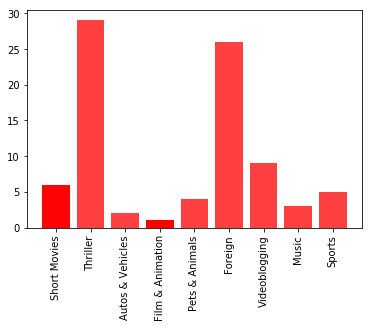

In [20]:
#!!!!!!!!!!!!!!!!!!!!! necesito decirle que ponga los labels verticales y ordenarlo de mayor a menor quizas? ojo 
# si lo quiero ordenar quizas se pierda el orden de los elementos ojo pues fueron sacados de listas separadas y no de un DF

plt.bar(category_names, category_count, facecolor="red", alpha=0.75, align="center")
plt.xticks(rotation=90)

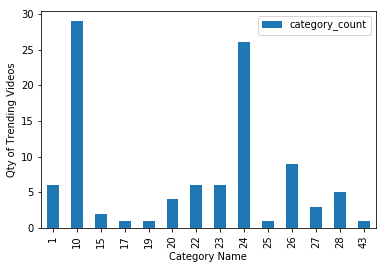

<Figure size 432x288 with 0 Axes>

In [21]:
# bar plot eje x categoria eje y len category_frecuence_df
#!!!!!!!!!!!!!!!!!!!!!!!!!! falta sacar nombre e la categoria/ 

# Create a bar chart based off of the group series from before
category_frecuence_chart = category_frecuence_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
category_frecuence_chart.set_xlabel("Category Name")
category_frecuence_chart.set_ylabel("Qty of Trending Videos")


plt.show()
plt.tight_layout()

## top 100 videos - views

In [24]:
# Cuantos views obtuvo cada video de los 100 mas trending 
# ojo. de la lista de 100 trending videos, necesito la cantidad maxima de views 

#top100videos_views = df.groupby(['id', 'views']).max()
#top100videos_views.head()


video_by_id = df.set_index("id").groupby(["id"])
top100videos_views = video_by_id.max()["views"]

top100videos_views_df = pd.DataFrame(top100videos_views)
#top100videos_views_df.sort_values("views",ascending=False)

top100videos_views_df = top100videos_views_df.groupby(['id']).head(100)
top100videos_views_df["views"] = top100videos_views_df["views"]
top100videos_views_df.sort_values("views",ascending=False)

,views
id,
VYOjWnS4cMY,225211923
FlsCjmMhFmw,149376127
ffxKSjUwKdU,148689896
zEf423kYfqk,139334502
7C2z4GqqS5E,123010920
M4ZoCHID9GI,122544931
TyHvyGVs42U,102012605
xTlNMmZKwpA,94254507
6ZfuNTqbHE8,91933007


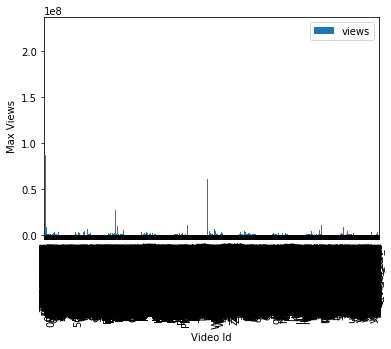

<Figure size 432x288 with 0 Axes>

In [23]:
top100videos_views_chart = top100videos_views_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
top100videos_views_chart.set_xlabel("Video Id")
top100videos_views_chart.set_ylabel("Max Views")


plt.show()
plt.tight_layout()